Monte Carlo simulations are computer simulations involving random numbers. They are a useful estimator of quantities whose direct computation is not feasible.  
In this report I describe and exemplify different methods of simulating random variables, in order to obtain samples from different known distributions. The code is provided in Python.

In [18]:
# Useful libraries when working with data distribution and visualization
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Random number generators
Using a random number table or a pseudo-random number generating algorithm, one can obtain a **standard uniform random variable** $U$.
$$ U \in {\cal U}_{[0,1]} $$

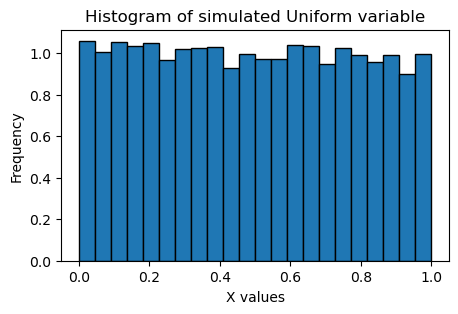

In [21]:
# Simulation of a standard uniform random variable with numpy
sample_size = 10000

# generate a sample of standard uniform distribution
U = np.random.uniform(size=sample_size)

# histogram of U
plt.figure(figsize=(5, 3))
plt.hist(U, density=True, bins='auto', edgecolor='black')
plt.title('Histogram of simulated Uniform variable')
plt.xlabel('X values')
plt.ylabel('Frequency')
plt.show()

In what follows, we are interested in generating random variables from other distributions, starting from a standard uniform random variable.

# Discrete methods
Consider a discrete random variable $X$ that takes values $x_0, x_1, ...$ with probabilities $p_0, p_1, ...$
$$ p_i = \mathbb{P}\{X = x_i\} , \quad \sum_i p_i = 1. $$
To generate $X$ using a Monte Carlo Simulation we can apply the algorithm:

## Algorithm 1 (Generating discrete variables)
1. Divide the interval [0,1] into subintervals following the rule:
   $$ I_0 = [0, p_0) $$
   $$ I_1 = [p_0, p_0 + p_1) $$
   $$ I_2 = [p_0 + p_1, p_0 + p_1 + p_2) ... $$
   The length of an interval $I_n$ is given by $p_n$
2. Obtain a standard uniform variable $U$ using a random number generator.
3. If $U$ belongs to $I_i$, then $X$ takes the value of $x_i$.
   $$ U \in I_i \Rightarrow X = x_i $$
Using the proprieties of the uniform random variable, we get the distribution of variable $X$:
$$ \mathbb{P}(X = x_i) = \mathbb{P}(U \in I_i) = |I_i| = p_i. $$

## Example 1: Generating a Bernoulli random variable  
A **Bernoulli random variable** $X$ is an experiment with binary outcome and probability of succes p. It is described by the following probability mass function:
$$ P(x) = \begin{cases} p &\text{if $x = 1$} \\ 1 - p &\text{if $x = 0$} \end{cases}. $$
To simulate $X$ using a standard uniform random variable $U$, we divide the interval $[0,1]$ in subintervals $I_0 = [0,p)$ and $I_1 = [p,1]$.  
Using algorithm 1 we define $X$:
$$ X = \begin{cases} 1 &\text{if $U \in I_0$} \\ 0 &\text{if $U \in I_1$} \end{cases} \iff X = \begin{cases} 1 &\text{if $U \leq p$} \\ 0 &\text{if $U > p$} \end{cases}. $$

Real value of p: 0.3
Estimation of p by simulation: 0.2955


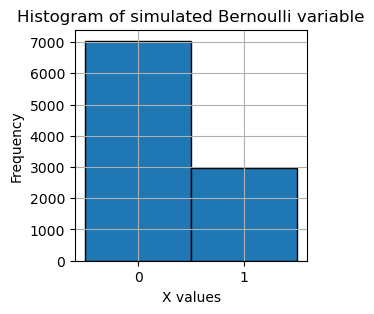

In [34]:
# Simulation of a Bernoulli random variable with p = 0.3
p = 0.3
sample_size = 10000

# generate a sample of standard uniform distribution
U = np.random.uniform(size=sample_size)

def bernoulli(u, p):
  return 1 if u <= p else 0

# map bernoulli function over the uniform sample
X = np.array([bernoulli(u, p) for u in U])

# estimated value of p:
estimated_p = np.sum(X) / len(X)
print(f"Real value of p: {p}")
print(f"Estimation of p by simulation: {estimated_p}")

# histogram of X
plt.figure(figsize=(3, 3))
plt.hist(X, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.title('Histogram of simulated Bernoulli variable')
plt.xlabel('X values')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Example 2: Generating a Poisson random variable  
A **Poisson random variable** describes the number of rare events occuring within a fixed period of time. Parameter $\lambda$ represents the frequency of the rare events. The probability mass function is:
$$ P(x) = e^{-\lambda} \frac{\lambda^x}{x!}. $$
We use a standard uniform random variable $U$ and find the set $I_i$ containing $U$:
$$ p_0 + ... + p_{i-1} \leq U < p_0 + ... + p_i $$
$$ F(i-1) \leq U < F(i) $$

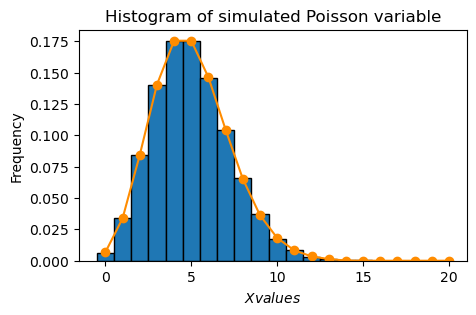

In [38]:
# Simulation of a Poisson random variable with lambda = 5
lamb = 5
sample_size = 100000

# array for simulated samples
X = []

for step in range(sample_size):
  # take a random value from the standard uniform distribution
  u = np.random.uniform()
  # compute the interval containing u
  i = 0
  F = np.exp(-lamb)
  term = F
  while u >= F:
    i = i + 1
    term = term * lamb / i
    F = F + term
  # assign value to Poisson variable
  X.append(i)

# plot actual pmf function
x = np.arange(0, 21)
pmf = np.exp(-lamb) * lamb**x / sp.special.factorial(x)
plt.figure(figsize=(5, 3))
plt.plot(x, pmf, color='darkorange', marker='o', linestyle='-')

# histogram of X
bins = np.arange(-0.5, 20.5, 1)
plt.hist(X, density='norm', bins=bins, edgecolor='black')
plt.title('Histogram of simulated Poisson variable')
plt.xlabel('$X values$')
plt.ylabel('Frequency')
plt.show()


# Inverse transform method
The inverse transform method is an effective way of generating continuous random variables whose cumulative distribution functions (CDFs) are known. The method makes use of the following theorem:  

## Theorem (Probability integral transform)  
Let $X$ be a continuous random variable with CDF $F_X(x)$. Then the random variable $U$ defined as $U = F_X(X)$ has a standard uniform distribution.
$$ U = F_X(X)  \Rightarrow U \in {\cal U}_{[0,1]} $$
In other words, any continuous distribution becomes standard uniform after being plugged into its own cumulative distribution function.  
By inverting this relation, we get that we can find any continuous distribution starting from a standard uniform random variable.
$$ X = F_X^{-1}(U), \quad U \in {\cal U}_{[0,1]} $$
To generate $X$ using a Monte Carlo Simulation we can apply the algorithm:

## Algorithm 2 (Inverse transform method)
1. Obtain a standard uniform variable $U$ using a random number generator.
2. Compute $X = F_X^{-1}(U)$. In other words, solve the equation $U=F_X(X)$ for $X$.

## Example 3: Generating an Exponential random variable  
An **Exponential random variable** describes the amount of time between two rare events, where the rare events follow a Poisson distribution with parameter $\lambda$. The probability density function is:
$$ f(x) = \lambda e^{-\lambda x}, \quad \text{ for } x > 0. $$
The cumulative density function can be calculated as follows:
$$ F(x) = \int_0^x f(t)\,dt = \int_0^x \lambda e^{-\lambda t} \,dt = -e^{-\lambda t} \Big|_0^x = 1 - e^{-\lambda x}. $$
To apply the inverse transform method, we now solve the following equation for X:
$$ 1 - e^{-\lambda X} = U $$
$$ e^{-\lambda X} = 1 - U $$
$$ -\lambda X = ln(1 - U) $$
$$ X = - \frac{1}{\lambda} ln(1 - U) $$

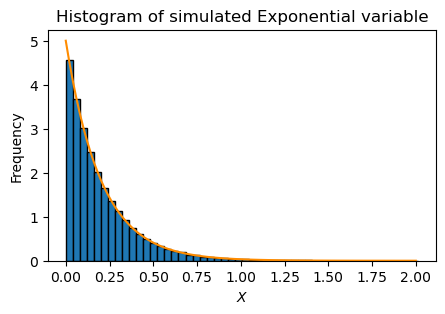

In [8]:
# Simulation of an Exponential random variable with lambda = 5
lamb = 5
sample_size = 100000

# generate a sample of standard uniform distribution
U = np.random.uniform(size=sample_size)

def exponential(u, lamb):
  return -1/lamb * np.log(1-u)

# map exponential function over the uniform sample
X = np.array([exponential(u, lamb) for u in U])

# plot actual pdf function
x = np.linspace(0,2,100)
pdf = lamb * np.exp( (-lamb) * x)
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, color='darkorange')

# histogram of X
plt.hist(X, density='norm', bins=50, edgecolor='black')
plt.title('Histogram of simulated Exponential variable')
plt.ylabel('Frequency')
plt.xlabel('$X$')
plt.show()

## Example 4: Generating a Gamma random variable  
A **Gamma random variable** describes a procedure consisting of $\alpha$ independent steps, where each step takes an Exponential amount of time ($\lambda$ parameter of Exponential distribution). The probability density function is:
$$ f(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\lambda x}, \quad \text{for } x > 0. $$
To simulate a Gamma random variable we will not use the inverse of the CDF, but rather the fact that a Gamma variable can be seen as the sum of n independent Exponential variables, by using the functions already defined above.

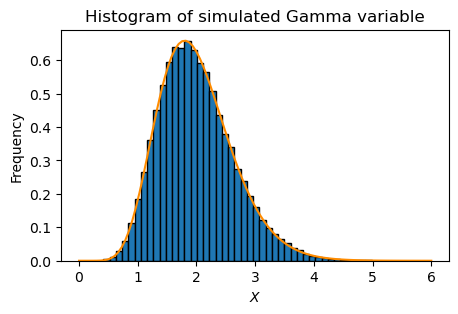

In [13]:
#Simulation of a Gamma random variable with lambda = 2.5, alpha = 10
lamb = 5
alpha = 10
sample_size = 100000

# array for simulated sums
S = np.zeros(sample_size)

# generate alpha Exponential random variables
for i in range(alpha):
  # generate a sample of standard uniform distribution
  U = np.random.uniform(size=sample_size)

  # map exponential function over the uniform sample
  X = np.array([exponential(u, lamb) for u in U])

  # add Exponential variable to sum array
  S = S + X

# plot actual pdf function
x = np.linspace(0,6,100)
pdf = lamb**alpha / sp.special.gamma(alpha) * x**(alpha - 1) * np.exp(-lamb * x)
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, color='darkorange')

# histogram of S
plt.hist(S, density='norm', bins=50, edgecolor='black')
plt.title('Histogram of simulated Gamma variable')
plt.ylabel('Frequency')
plt.xlabel('$X$')
plt.show()

# Rejection method
The rejection method is a way of generating continuous random variables when we know the density of the distribution we are sampling from, but we do not have an easy way to compute the CDF.  
The method makes use of the following theorem:

## Theorem (Marginal density from joint density)
Let a pair $(X,Y)$ have Uniform distribution over the region 
$$ A = \Big\{(x,y) \, | \, 0 \leq y \leq f(x) \Big\} $$
for some density function $f$. Then $f$ is the density of $X$.  
  
What this means is that we can generate a random variable having our desired distribution by generating points belonging to the area $A$. This constitues the basis to the following algorithm:

## Algorithm 3 (Rejection method)
1. Find a bounding box for the curve $f(x)$ i.e. the numbers $a, b, c \in \mathbb{R}$ for which
  $$ 0 \leq f(x) \leq c \, , \quad a \leq x \leq b $$
2. Obtain two standard uniform variable $U, V$ using a random number generator.
  $$ U \in {\cal U}_{[0,1]} \, , \quad V \in {\cal U}_{[0,1]} $$
3. Define $X$ and $Y$ such that the point $(X,Y)$ is uniformly distributed in the bounding box.
  $$ X = a + (b-a) U \, , \, Y = cV \quad \Rightarrow \quad
   X \in {\cal U}_{[a,b]} \, , \, V \in {\cal U}_{[0,c]} $$
4. If $Y > f(X)$, reject the point and return to step 2.  
  If $Y \leq f(X)$, then $X$ is the desired random variable having the density $f(x)$. 

<img src="rejection_method.png" width="400"><br />
Figure 1: Rejection method (Baron 2014)

## Example 5: Generating a Beta random variable
A **Beta random variable** is characterized by two constants $\alpha$ and $\beta$. Its probability density functions is:
$$ f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha - 1}(1-x)^{\beta - 1} , \quad \text{for } 0 \leq x \leq 1.$$
To generate a Beta random variable we will use the Rejection method.

### Step 1: Choose a bounding box

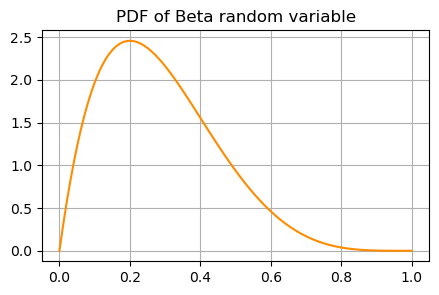

In [16]:
# Visualizing a Beta variable for alpha = 2, beta = 5
alpha = 2
beta = 5

# plot the pdf function
x = np.linspace(0,1,100)
const = sp.special.gamma(alpha + beta) / (sp.special.gamma(alpha) * sp.special.gamma(beta))
pdf = const * x**(alpha - 1) * (1 - x)**(beta - 1)
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, color='darkorange')
plt.title("PDF of Beta random variable")
plt.grid()
plt.show()

We can see that for $ 0 \leq x \leq 1 $, the function is bounded by $ 0 \leq f(x) \leq 2.5 $, so we will choose the constants as follows:
$$ a = 0, \quad b = 1, \quad c = 2.5. $$

### Step 2: Generate samples

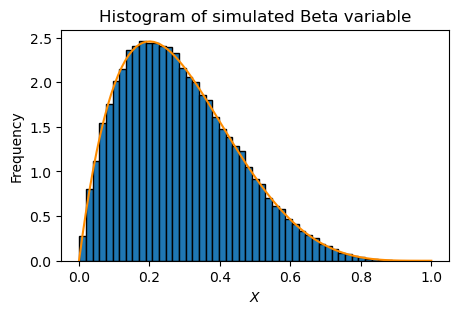

In [17]:
# Simulation of a Beta random variable with alpha = 2, beta = 5
sample_size = 100000
a, b, c = 0, 1, 2.5

# array for simulated samples
X = []

def beta_func(x, alpha, beta):
  const = sp.special.gamma(alpha + beta) / (sp.special.gamma(alpha) * sp.special.gamma(beta))
  return const * x**(alpha - 1) * (1 - x)**(beta - 1)

for step in range(sample_size):
  while True:
    # take two random values from the standard uniform distribution
    u = np.random.uniform()
    v = np.random.uniform()
    # compute x and y coordinates
    x = a + (b-a) * u
    y = c * v
    # accept the sample if condition is met
    if y <= beta_func(x, alpha, beta):
      # accept sample
      X.append(x)
      break
    # otherwise, a new sample is generated

# plot actual pdf function
x = np.linspace(0,1,100)
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, color='darkorange')

# histogram of X
plt.hist(X, density='norm', bins=50, edgecolor='black')
plt.title('Histogram of simulated Beta variable')
plt.ylabel('Frequency')
plt.xlabel('$X$')
plt.show()
